# Final Project Submission

Please fill out:
* Student name: Jaklyn Soler
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Rafael Carassco
* Blog post URL:


# Background Information

I just received a call from Microsoft and they have decided to build a film studio to create movies. They want me to help them better understand the movie industry. I need to explore what type of films are currently doing the best at the box office. Then I will create actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# First, let's load some data! 

In [1]:
import patoolib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('zippedData')

In [3]:
cd\unzipped

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online-master/zippedData/unzipped


In [4]:
#To Prohibit Truncating: 

pd.options.display.max_rows = 300

# Great! Now, let's take a peek at the data we have!

In [5]:
pd.options.display.max_rows = 100

In [6]:
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
movie_budgets.shape

(5782, 6)

In [8]:
movies_again = pd.read_csv('tmdb.movies.csv')
movies_again.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
movies_again.shape

(26517, 10)

In [10]:
#Let's determine if the id in the movies_again df aligns with the id info in the ratings df
movies_again[movies_again['id'] == 862]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2473,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174


In [11]:
ratings = pd.read_csv('rt.reviews.tsv', sep = '\t', engine = 'python')
ratings[200:220]

,id,review,rating,fresh,critic,top_critic,publisher,date
200,6,In this world of Information Highway sophistic...,NaN,rotten,Jack Kroll,1,Newsweek,"January 18, 2013"
201,6,...watchable yet far-from-engrossing...,2.5/4,fresh,David Nusair,0,Reel Film Reviews,"March 29, 2012"
202,6,"Little more than another Hollywood sizzler, a ...",7/10,fresh,John J. Puccio,0,Movie Metropolis,"March 1, 2012"
203,6,The impact of 'Disclosure' is weakened signifi...,NaN,rotten,Betty Jo,0,ReelTalk Movie Reviews,"February 9, 2012"
204,6,A glibly entertaining corporate thriller.,B+,fresh,Owen Gleiberman,1,Entertainment Weekly,"November 5, 2008"
205,6,"This is a deeply silly film, highlighting some...",NaN,rotten,NaN,0,Film4,"November 5, 2008"
206,6,"The movie comes closest to thematic coherence,...",3/4,fresh,NaN,0,TV Guide,"November 5, 2008"
207,6,"Genuinely gripping, Demi makes an awesome femm...",4/5,fresh,Ian Nathan,0,Empire Magazine,"November 5, 2008"
208,6,You know in advance what the politics will be:...,NaN,rotten,Jonathan Rosenbaum,1,Chicago Reader,"November 5, 2008"
209,6,Levinson and Attanasio don't ignore the basics...,NaN,fresh,Todd McCarthy,1,Variety,"June 9, 2008"


In [12]:
ratings[ratings['id'] == 862]

,id,review,rating,fresh,critic,top_critic,publisher,date
21636,862,The situations in this sitcom never get as fun...,C+,rotten,Joel Siegel,0,Good Morning America,"January 4, 2018"
21637,862,"You, Me and Dupree is an inconsistent trifle -...",6/10,rotten,Joshua Starnes,0,ComingSoon.net,"December 28, 2010"
21638,862,Not a single laugh here,NaN,rotten,Fernando F. Croce,0,CinePassion,"August 30, 2009"
21639,862,"The film is a mishmash of half-baked jokes, si...",NaN,rotten,Devin Faraci,0,CHUD,"February 27, 2009"
21640,862,This is one of the worst scripts in the histor...,1/5,rotten,Jim Lane,0,Sacramento News &amp; Review,"August 7, 2008"
...,...,...,...,...,...,...,...,...
21772,862,The comedy is obvious and flat while the drama...,NaN,rotten,Kirk Honeycutt,1,Hollywood Reporter,"July 7, 2006"
21773,862,NaN,2/5,rotten,Kit Bowen,0,Hollywood.com,"September 8, 2009"
21774,862,NaN,2/5,rotten,Kit Bowen,0,Hollywood.com,"November 20, 2008"
21775,862,NaN,1/5,rotten,NaN,0,Bullz-Eye.com,"July 15, 2006"


In [13]:
ratings.shape

(54432, 8)

In [14]:
movie_info = pd.read_csv('rt.movie_info.tsv', sep = '\t')
movie_info.head()
#check to see how many of the box office values are NAN
#remove currency?

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [15]:
movie_info.shape

(1560, 12)

# Let's set the indexes as the id columns for the Rotten Tomato dataframes in order to join them. 

In [16]:
#WE ARE GOING TO JOIN THE 2 ROTTEN TOMATOES TABLES SO LETS SET THEIR INDEX TO ID
movie_info = movie_info.set_index('id')

In [17]:
movie_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [18]:
ratings = ratings.set_index('id')

In [19]:
ratings.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [20]:
rotten_tomato_df = ratings.join(movie_info, how='left', lsuffix='x')

In [21]:
rotten_tomato_df.head(20)

,review,ratingx,fresh,critic,top_critic,publisher,date,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [22]:
rotten_tomato_df.shape

(54432, 18)

In [23]:
#removing box office column, currency column, date, and dvd date 
cols_to_remove = ['box_office', 'currency', 'date', 'dvd_date']
cols = [col for col in rotten_tomato_df.columns if col not in cols_to_remove]
less_one_row_rotten_df = rotten_tomato_df[cols]

In [24]:
less_one_row_rotten_df.head()

,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio
id,,,,,,,,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One


In [25]:
less_one_row_rotten_df.shape

(54432, 14)

# Let's see if there are any NaNs or Duplicates 

In [26]:
#Search for NaNs
#This should return the total number of NaN values.

less_one_row_rotten_df.isna().sum()

review           5563
ratingx         13517
fresh               0
critic           2722
top_critic          0
publisher         309
synopsis          132
rating             86
genre              87
director         5440
writer           9226
theater_date     1226
runtime           838
studio          14307
dtype: int64

In [27]:
#Search for Duplicates

duplicates = less_one_row_rotten_df[less_one_row_rotten_df.duplicated()]
print(len(duplicates))
duplicates.head()

186


,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio
id,,,,,,,,,,,,,,
33,NaN,4/5,fresh,NaN,0,Film Threat,Howard W. Campbell Jr. (Nick Nolte) is an Amer...,R,Action and Adventure|Drama|Mystery and Suspense,Keith Gordon,NaN,"Nov 1, 1996",114 minutes,NaN
35,NaN,4.5/5,fresh,NaN,0,Film Threat,"In this film, conjoined twins Blake and Franci...",R,Drama,Michael Polish,Michael Polish|Mark Polish,"Jul 30, 1999",110 minutes,NaN
35,NaN,4/5,fresh,NaN,0,Film Threat,"In this film, conjoined twins Blake and Franci...",R,Drama,Michael Polish,Michael Polish|Mark Polish,"Jul 30, 1999",110 minutes,NaN
40,NaN,2/5,rotten,NaN,0,Film Threat,John Sayles' Casa de los Babys tells the tale ...,R,Drama,John Sayles,John Sayles,"Sep 19, 2003",95 minutes,NaN
56,NaN,3/4,fresh,Jeanne Aufmuth,0,Palo Alto Weekly,Albert Hughes and his brother Allen Hughes fol...,R,Drama,Allen Hughes|Albert Hughes,Michael Henry Brown|Albert Hughes|Allen Hughes,"Oct 6, 1995",119 minutes,NaN


In [28]:
#Let's Drop the Duplicates 

rotten_no_duplicates = less_one_row_rotten_df.drop_duplicates(inplace = False)

In [29]:
#Let's verify that those duplicates were removed
less_one_row_rotten_df.shape

(54432, 14)

In [30]:
rotten_no_duplicates.shape

(54246, 14)

In [31]:
rotten_no_duplicates['ratingx'].value_counts()

3/5      4311
4/5      3655
3/4      3566
2/5      3127
2/4      2697
         ... 
4.2/5       1
F-          1
7.8         1
1-5         1
7.9         1
Name: ratingx, Length: 186, dtype: int64

In [32]:
rotten_no_duplicates['ratingx'].describe()

count     40746
unique      186
top         3/5
freq       4311
Name: ratingx, dtype: object

In [33]:
rotten_no_duplicates['movie_title'] = ""

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
rotten_no_duplicates.head(2)

,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title
id,,,,,,,,,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,


In [35]:
rotten_no_duplicates.reset_index(drop=False, inplace=True)

In [36]:
rotten_no_duplicates.head(2)

,id,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,


In [37]:
rotten_no_duplicates['ratingx'].value_counts()

3/5      4311
4/5      3655
3/4      3566
2/5      3127
2/4      2697
         ... 
4.2/5       1
F-          1
7.8         1
1-5         1
7.9         1
Name: ratingx, Length: 186, dtype: int64

# Let's Start Converting These Ratings to Numbers as Integers!
## Let's convert to a 10 point scale to make things easier:

In [38]:
#Convert 5/5 to 10

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('5/5',10,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [39]:
#Convert 4/5 to 8

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('4/5',8,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
#Convert 3/5 to 6

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('3/5',6,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [41]:
#Convert 2/5 to 4

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('2/5',4,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [42]:
#Convert 1/5 to 2

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('1/5',2,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Okay, let's take a look at other values that are still present. 

In [43]:
rotten_no_duplicates['ratingx'].value_counts()

6        4311
8        3655
3/4      3566
4        3127
2/4      2697
         ... 
7.7         1
5.2         1
3.3         1
4.2/5       1
F-          1
Name: ratingx, Length: 186, dtype: int64

In [44]:
#Convert 2/4 to 5

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('2/4',5,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [45]:
#Convert 3/4 to 7.5

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('3/4',7.5,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [46]:
#Convert 9.6/10 to 9.6

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('9.6/10',9.6,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [47]:
rotten_no_duplicates['ratingx'].describe

<bound method NDFrame.describe of 0            6
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
54241      NaN
54242        2
54243        4
54244    2.5/5
54245        6
Name: ratingx, Length: 54246, dtype: object>

In [48]:
#Convert 2.5/5 to 5

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('2.5/5',5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [49]:
rotten_no_duplicates['ratingx'].value_counts()

6        4311
5        3678
8        3655
7.5      3566
4        3127
         ... 
7.7         1
5.2         1
3.3         1
4.2/5       1
7.4         1
Name: ratingx, Length: 185, dtype: int64

In [50]:
#Convert 3.5/5 to 7

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('3.5/5',7, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [51]:
#Convert 2.5/4 to 6.2

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('2.5/4',6.2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [52]:
#Convert 3.5/4 to 8.75

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('3.5/4',8.75, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Interpreting Letters:

### 0 out of 10 would be an F and 10/10 would be an A+.

### Logically, if someone is giving a review of F, they do not mean a 65 which is converted to 6.5/10

### Let's try evenly distributing these numbers to align with our other ratings.

### From our value counts, it looks like we have a highest of A+ and lowest of F-.

### We have 15 values and over a 10 point scale, each step is valued at .714. 

### Since we are interpreting F- as zero, we did not count it as value when we determined the 

### A+ = 9.99
### A = 9.282
### A- = 8.568
### B+ = 7.854
### B = 7.14
### B- = 6.426
### C+ = 5.712
### C = 4.998
### C- = 4.284
### D+ = 3.57
### D = 2.856
### D- = 2.142
### F+ 1.428
### F = .714
### F- = 0

In [53]:
#Convert A+ TO 9.99

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('A+',9.99, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
#Convert A TO 9.282

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('A',9.282, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [55]:
#Convert A- TO 8.568

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('A-',8.568, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [56]:
#Convert B+ TO 7.854

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('B+',7.854, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [57]:
#Convert B TO 7.14

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('B',7.14, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [58]:
#Convert B- TO 6.426

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('B-',6.426, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [59]:
#Convert C+ TO 5.712

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('C+',5.712, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [60]:
#Convert C TO 4.998

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('C',4.998, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [61]:
#Convert C- TO 4.284

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('C-',4.284, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [62]:
#Convert D+ TO 3.57

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('D+',3.57, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [63]:
#Convert D TO 2.856

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('D',2.856, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [64]:
#Convert D- TO 2.142

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('D-',2.142, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [65]:
#Convert F+ TO 1.428

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('F+',1.428, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [66]:
#Convert F TO 2.142

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('F',.714, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [67]:
#Convert F- TO 0

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('F-',0, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Now for the values ending in /4

In [68]:
rotten_no_duplicates['ratingx'].value_counts()

6        4311
5        3678
8        3655
7.5      3566
4        3127
         ... 
3 1/2       1
9.6         1
5.2         1
3.3         1
0           1
Name: ratingx, Length: 185, dtype: int64

In [69]:
#Convert 0/4 to 0

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('0/4',0, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [70]:
#Convert 0/4 to 0

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace(' 0/4',0, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [71]:
#Convert .5/4 to .125

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('.5/4',.125, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [72]:
#Convert 0.5/4 to .125

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('0.5/4',.125, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [73]:
#Convert 1.0/4 

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('1.0/4',2.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [74]:
#Convert 1/4 to 2.5

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('1/4',2.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [75]:
#Convert 1.5/4 

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('1.5/4',3.75, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [76]:
#Convert 2.0/4 to 5

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('2.0/4',5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [77]:
#Convert 2/4 to 5

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('2/4',5.0, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [78]:
#Convert 3/4 to 7.5

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('3/4',7.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [79]:
#Convert 3.0/4 to 7.5

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('3.0/4',7.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [80]:
#Convert 4/4 to 10

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('4/4',10, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [81]:
#Convert 4.0/4 to 10

for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('4.0/4',10, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [82]:
rotten_no_duplicates.shape

(54246, 16)

# Let's Investigate These Letter Values

# For NaN values in 'ratingx' with a 'rotten' value in ['fresh'], let's replace the NaN values w SUM 1 through 5 and divide by 5. Value = 3

# For NaN values in 'ratingx' with a 'fresh' value in ['fresh'], let's replace the NaN values w SUM 5 through 10 and divide by 5. Value = 9

### R value columns need to be 'fresh' values

In [83]:
rotten_no_duplicates[rotten_no_duplicates['ratingx'] == 'R']

,id,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title
6484,251,What Carol captures more specifically than the...,R,fresh,Ian Barr,0,NaN,"In this adaptation of the novel ""The Price of ...",R,Drama|Romance,Todd Haynes,Phyllis Nagy,"Nov 20, 2015",118 minutes,The Weinstein Company,
8566,322,"With a reasonable smattering of gore, and some...",R,fresh,Felix Hubble,0,NaN,When her heart is stolen by a seductive strang...,R,Horror,Guillermo del Toro,Guillermo del Toro|Matthew Robbins|Lucinda Coxon,"Oct 16, 2015",119 minutes,Universal Pictures,
16395,667,The humour thrives primarily off of the kookin...,R,fresh,Isobel Yeap,0,NaN,"In the 3D animated comedy, The Angry Birds Mov...",PG,Animation|Kids and Family,Clay Kaytis|Fergal Reilly,Jon Vitti,"May 20, 2016",95 minutes,Sony Pictures,
18573,760,The times they are a-changin': a frat comedy w...,R,fresh,Jaymes Durante,0,NaN,Young parents Mac (Seth Rogen and Kelly Radnor...,R,Comedy,Nicholas Stoller,NaN,"May 20, 2016",92 minutes,Universal Pictures,
38353,1483,Often evoking the dark humour of a Beckett pla...,R,fresh,Isobel Yeap,0,NaN,The Dressmaker tells the story of the beautifu...,R,Drama,Jocelyn Moorhouse,NaN,"Sep 23, 2016",118 minutes,NaN,


In [84]:
for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('R', 9,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [85]:
#Checking that the R values have been removed.
rotten_no_duplicates[rotten_no_duplicates['ratingx'] == 'R']

,id,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title


### T value needs to be changed to our 'rotten' value.

In [86]:
rotten_no_duplicates[rotten_no_duplicates['ratingx'] == 'T']

,id,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title
46838,1765,"upposed to be a horror-comedy film, but it's n...",T,rotten,Jeff Vice,0,Deseret News (Salt Lake City),"The devil will find work for idle hands to do,...",9,Comedy|Horror,Rodman Flender,Terri Hughes|Ron Milbauer,"Apr 30, 1999",92 minutes,NaN,


In [87]:
for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('T', 3,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [88]:
#Checking that the t values have been removed.
rotten_no_duplicates[rotten_no_duplicates['ratingx'] == 'T']

,id,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title


### N value needs to be changed to 'rotten' value.

In [89]:
rotten_no_duplicates[rotten_no_duplicates['ratingx'] == 'N']

,id,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title
5377,210,What I find so jarring about The Light Between...,N,rotten,Phoebe Chen,0,NaN,"DreamWorks Pictures' ""The Light Between Oceans...",PG-13,Drama|Romance,Derek Cianfrance,Derek Cianfrance,"Sep 2, 2016",132 minutes,NaN,
48829,1832,"Unintelligible for new viewers, appropriate on...",N,rotten,Peter Walsh,0,NaN,First there was an opportunity......then there...,9,Drama,Danny Boyle,John Hodge,"Mar 17, 2017",118 minutes,TriStar Pictures,


In [90]:
for cell in rotten_no_duplicates.columns:
    rotten_no_duplicates[cell].replace('N', 3,inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [91]:
#Checking that the N values have been removed.
rotten_no_duplicates[rotten_no_duplicates['ratingx'] == 'N']

,id,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title


In [92]:
new_df = rotten_no_duplicates

# Replace the /5 values

In [93]:
#Convert 0/5 to 0

for cell in new_df.columns:
    new_df[cell].replace('0/5', 0, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [94]:
#Convert 0.5/5 to 1

for cell in new_df.columns:
    new_df[cell].replace('0.5/5', 1, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [95]:
#Convert 1.0/5 to 2

for cell in new_df.columns:
    new_df[cell].replace('1.0/5', 2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [96]:
#Convert 1.5/5 to 3

for cell in new_df.columns:
    new_df[cell].replace('1.5/5', 3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [97]:
#Convert 1.6/5 to 3.2

for cell in new_df.columns:
    new_df[cell].replace('1.6/5',3.2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [98]:
#Convert 1.9/5 to 3.8

for cell in new_df.columns:
    new_df[cell].replace('1.9/5',3.8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [99]:
#Convert 2.0/5 to 4

for cell in new_df.columns:
    new_df[cell].replace('2.0/5',4, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [100]:
#Convert 2.2/5 to 4.4

for cell in new_df.columns:
    new_df[cell].replace('2.2/5',4.4, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [101]:
#Convert 2.3/5 to 4.6

for cell in new_df.columns:
    new_df[cell].replace('2.3/5',4.6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [102]:
#Convert 2.4/5 to 4.8

for cell in new_df.columns:
    new_df[cell].replace('2.4/5',4.8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [103]:
#Convert 2.6/5 to 5.12

for cell in new_df.columns:
    new_df[cell].replace('2.6/5',5.12, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [104]:
#Convert 2.7/5 to 5.4

for cell in new_df.columns:
    new_df[cell].replace('2.7/5',5.4, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [105]:
#Convert 3.0/5 to 6

for cell in new_df.columns:
    new_df[cell].replace('3.0/5',6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [106]:
#Convert 3.1/5 to 6.2

for cell in new_df.columns:
    new_df[cell].replace('3.1/5',6.2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [107]:
#Convert 3.3/5 to 6.6

for cell in new_df.columns:
    new_df[cell].replace('3.3/5',6.6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [108]:
#Convert 3.6/5 to 7.2

for cell in new_df.columns:
    new_df[cell].replace('3.6/5',7.2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [109]:
#Convert 3.7/5 to 7.4

for cell in new_df.columns:
    new_df[cell].replace('3.7/5',7.4, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [110]:
#Convert 3.8/5 to 7.6

for cell in new_df.columns:
    new_df[cell].replace('3.8/5',7.6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [111]:
#Convert 4.0/5 to 8

for cell in new_df.columns:
    new_df[cell].replace('4.0/5',8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [112]:
#Convert 4.2/5 to 8.4

for cell in new_df.columns:
    new_df[cell].replace('4.2/5',8.4, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [113]:
#Convert 4.3/5 to 8.6

for cell in new_df.columns:
    new_df[cell].replace('4.3/5',8.6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [114]:
#Convert 4.4/5 to 8.8

for cell in new_df.columns:
    new_df[cell].replace('4.4/5',8.8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [115]:
#Convert 4.5/5 to 9

for cell in new_df.columns:
    new_df[cell].replace('4.5/5',9, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [116]:
#Convert 5.0/5 to 10

for cell in new_df.columns:
    new_df[cell].replace('5.0/5',10, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [117]:
#Convert 5.5/5 to 10

for cell in new_df.columns:
    new_df[cell].replace('5.5/5',10, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Now let's get rid of the /10 values

In [118]:
#Convert 0/10 to 0

for cell in new_df.columns:
    new_df[cell].replace('0/10',0, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [119]:
#Convert 0.5/10 to 0

for cell in new_df.columns:
    new_df[cell].replace('0.5/10',.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [120]:
#Convert 1/10 to 1

for cell in new_df.columns:
    new_df[cell].replace('1/10',1, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [121]:
#Convert 1.5/10 to 1.5

for cell in new_df.columns:
    new_df[cell].replace('1.5/10',1.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [122]:
#Convert 2/10 to 2

for cell in new_df.columns:
    new_df[cell].replace('2/10',2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [123]:
#Convert 2.1/10 to 2.1

for cell in new_df.columns:
    new_df[cell].replace('2.1/10',2.1, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [124]:
#Convert 2.3/10 to 2.3

for cell in new_df.columns:
    new_df[cell].replace('2.3/10',2.3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [125]:
#Convert 2.5/10 to 2.5

for cell in new_df.columns:
    new_df[cell].replace('2.5/10',2.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [126]:
#Convert 3/10 to 3

for cell in new_df.columns:
    new_df[cell].replace('3/10',3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [127]:
#Convert 3.0/10 to 3

for cell in new_df.columns:
    new_df[cell].replace('3.0/10',3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [128]:
#Convert 3.5/10 to 3.5

for cell in new_df.columns:
    new_df[cell].replace('3.5/10',3.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [129]:
#Convert 3.8/10 to 3.8

for cell in new_df.columns:
    new_df[cell].replace('3.8/10',3.8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [130]:
#Convert 4/10 to 4

for cell in new_df.columns:
    new_df[cell].replace('4/10',4, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [131]:
#Convert 4.0/10 to 4

for cell in new_df.columns:
    new_df[cell].replace('4.0/10',4, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [132]:
#Convert 4.1/10 to 4.1

for cell in new_df.columns:
    new_df[cell].replace('4.1/10',4.1, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [133]:
#Convert 4.2/10 to 4.2

for cell in new_df.columns:
    new_df[cell].replace('4.2/10',4.2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [134]:
#Convert 4.3/10 to 4.3

for cell in new_df.columns:
    new_df[cell].replace('4.3/10',4.3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [135]:
#Convert 4.5/10 to 4.5

for cell in new_df.columns:
    new_df[cell].replace('4.5/10',4.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [136]:
#Convert 4.9/10 to 4.9

for cell in new_df.columns:
    new_df[cell].replace('4.9/10',4.9, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [137]:
#Convert 5/10 to 5

for cell in new_df.columns:
    new_df[cell].replace('5/10',5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [138]:
#Convert 5.0/10 to 5

for cell in new_df.columns:
    new_df[cell].replace('5.0/10',5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [139]:
#Convert 5.5/10 to 5.5

for cell in new_df.columns:
    new_df[cell].replace('5.5/10',5.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [140]:
#Convert 5.8/10 to 5.8

for cell in new_df.columns:
    new_df[cell].replace('5.8/10',5.8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [141]:
#Convert 5.9/10 to 5.9

for cell in new_df.columns:
    new_df[cell].replace('5.9/10',5.9, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [142]:
#Convert 6/10 to 6

for cell in new_df.columns:
    new_df[cell].replace('6/10',6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [143]:
#Convert 6.0/10 to 6

for cell in new_df.columns:
    new_df[cell].replace('6.0/10',6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [144]:
#Convert 6.2/10 to 6.2

for cell in new_df.columns:
    new_df[cell].replace('6.2/10',6.2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [145]:
#Convert 6.3/10 to 6.3

for cell in new_df.columns:
    new_df[cell].replace('6.3/10',6.3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [146]:
#Convert 6.5/10 to 6.5

for cell in new_df.columns:
    new_df[cell].replace('6.5/10',6.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [147]:
#Convert 6.8/10 to 6.8

for cell in new_df.columns:
    new_df[cell].replace('6.8/10',6.8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [148]:
#Convert 6.9/10 to 6.9

for cell in new_df.columns:
    new_df[cell].replace('6.9/10',6.9, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [149]:
#Convert 7/10 to 7

for cell in new_df.columns:
    new_df[cell].replace('7/10',7, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [150]:
#Convert 7.0/10 to 7.0

for cell in new_df.columns:
    new_df[cell].replace('7.0/10',7.0, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [151]:
#Convert 7.1/10 to 7.1

for cell in new_df.columns:
    new_df[cell].replace('7.1/10',7.1, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [152]:
#Convert 7.2/10 to 7.2

for cell in new_df.columns:
    new_df[cell].replace('7.2/10',7.2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [153]:
#Convert 7.3/10 to 7.3

for cell in new_df.columns:
    new_df[cell].replace('7.3/10',7.3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [154]:
#Convert 7.4/10 to 7.4

for cell in new_df.columns:
    new_df[cell].replace('7.4/10',7.4, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [155]:
#Convert 7.5/10 to 7.5

for cell in new_df.columns:
    new_df[cell].replace('7.5/10',7.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [156]:
#Convert 7.6/10 to 7.6

for cell in new_df.columns:
    new_df[cell].replace('7.6/10',7.6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [157]:
#Convert 7.7/10 to 7.7

for cell in new_df.columns:
    new_df[cell].replace('7.7/10',7.7, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [158]:
#Convert 7.8/10 to 7.8

for cell in new_df.columns:
    new_df[cell].replace('7.8/10',7.8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [159]:
#Convert 7.9/10 to 7.9

for cell in new_df.columns:
    new_df[cell].replace('7.9/10',7.9, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [160]:
#Convert 8/10 to 8

for cell in new_df.columns:
    new_df[cell].replace('8/10',8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [161]:
#Convert 8.0/10 to 8

for cell in new_df.columns:
    new_df[cell].replace('8.0/10',8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [162]:
#Convert 8.1/10 to 8.1

for cell in new_df.columns:
    new_df[cell].replace('8.1/10',8.1, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [163]:
#Convert 8.2/10 to 8.2

for cell in new_df.columns:
    new_df[cell].replace('8.2/10',8.2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [164]:
#Convert 8.3/10 to 8.3

for cell in new_df.columns:
    new_df[cell].replace('8.3/10',8.3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [165]:
#Convert 8.4/10 to 8.4

for cell in new_df.columns:
    new_df[cell].replace('8.4/10',8.4, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [166]:
#Convert 8.5/10 to 8.5

for cell in new_df.columns:
    new_df[cell].replace('8.5/10',8.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [167]:
#Convert 8.6/10 to 8.6

for cell in new_df.columns:
    new_df[cell].replace('8.6/10',8.6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [168]:
#Convert 8.7/10 to 8.7

for cell in new_df.columns:
    new_df[cell].replace('8.7/10',8.7, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [169]:
#Convert 8.8/10 to 8.8

for cell in new_df.columns:
    new_df[cell].replace('8.8/10',8.8, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [170]:
#Convert 8.9/10 to 8.9

for cell in new_df.columns:
    new_df[cell].replace('8.9/10',8.9, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [171]:
#Convert 9/10 to 9

for cell in new_df.columns:
    new_df[cell].replace('9/10',9, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [172]:
#Convert 9.0/10 to 9.0

for cell in new_df.columns:
    new_df[cell].replace('9.0/10',9.0, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [173]:
#Convert 9.2/10 to 9.2

for cell in new_df.columns:
    new_df[cell].replace('9.2/10',9.2, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [174]:
#Convert 9.5/10 to 9.5

for cell in new_df.columns:
    new_df[cell].replace('9.5/10',9.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Now let's get rid of the /6 values

In [175]:
#Convert 0/6 to 0

for cell in new_df.columns:
    new_df[cell].replace('0/6',0, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [176]:
#Convert 1/6 to 1.6

for cell in new_df.columns:
    new_df[cell].replace('1/6',1.6, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [177]:
#Convert 2/6 to 3.3

for cell in new_df.columns:
    new_df[cell].replace('2/6',3.3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [178]:
#Convert 2.6/6 to 4.3

for cell in new_df.columns:
    new_df[cell].replace('2.6/6',4.3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [179]:
#Convert 3/6 to 5

for cell in new_df.columns:
    new_df[cell].replace('3/6',5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [180]:
#Convert 4/6 to 6.66

for cell in new_df.columns:
    new_df[cell].replace('4/6',6.66, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [181]:
#Convert 5/6 to 8.3

for cell in new_df.columns:
    new_df[cell].replace('5/6',8.3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [182]:
#Convert 5.6/6 to 9.3

for cell in new_df.columns:
    new_df[cell].replace('5.6/6',9.3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Now let's convert a few extra weirdos

In [183]:
#Convert 1/2 to 5

for cell in new_df.columns:
    new_df[cell].replace('1/2',5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [184]:
#Convert 2/2 to 10

for cell in new_df.columns:
    new_df[cell].replace('2/2',10, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [185]:
#Convert 2.1/2 to 10

for cell in new_df.columns:
    new_df[cell].replace('2.1/2',10, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [186]:
#Convert 2.3/4 to 5.75

for cell in new_df.columns:
    new_df[cell].replace('2.3/4',5.75, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [187]:
#Convert 3 1/2 to 3.5

for cell in new_df.columns:
    new_df[cell].replace('3 1/2',3.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [188]:
#Convert 3/2 to 10

for cell in new_df.columns:
    new_df[cell].replace('3/2',10, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [189]:
#Convert 6/8 to 7.5

for cell in new_df.columns:
    new_df[cell].replace('6/8',7.5, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [190]:
#Convert 5/4 to 10

for cell in new_df.columns:
    new_df[cell].replace('5/4',10, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# And let's delete this 1-5 value

In [191]:
# Get names of indexes 
indexNames = new_df[new_df['ratingx'] == '1-5' ].index
# Delete these row indexes from dataFrame
new_df.drop(indexNames , inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [192]:
new_df['ratingx'].value_counts()

6      4792
8      4170
5      4053
7.5    3653
4      3391
       ... 
6.7       1
8.9       1
4.1       1
1.7       1
7.3       1
Name: ratingx, Length: 129, dtype: int64

# Let's Turn These Values into Integers

In [193]:
type(new_df['ratingx'][9])

float

In [194]:
new_df['ratingx'] = pd.to_numeric(new_df['ratingx'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [195]:
type(new_df['ratingx'][9])

numpy.float64

### Let's round these values to whole numbers.

In [196]:
new_df['ratingx'] = new_df['ratingx'].round(decimals=0)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
new_df['ratingx'].value_counts()

8.0     8875
6.0     8812
4.0     5271
5.0     4891
9.0     3612
7.0     3131
10.0    2363
2.0     2132
3.0      925
0.0      407
1.0      326
Name: ratingx, dtype: int64

# Let's replace the NaN values in 'ratingx' with a 9 for fresh and a 3 for rotten.

### If rating x is null, return fresh, otherwise, return ratingx. 

In [198]:
new_df['ratings'] = np.where(new_df['ratingx'].isnull(), new_df['fresh'], new_df['ratingx'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
new_df.head(1)

,id,review,ratingx,fresh,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title,ratings
0,3,A distinctly gallows take on contemporary fina...,6.0,fresh,PJ Nabarro,0,Patrick Nabarro,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,,6


### Let's Transform the Ratings into numbers only by replacing fresh with 9 and replacing rotten with 3. 

In [200]:
# Convert fresh into 9

for cell in new_df.columns:
    new_df[cell].replace('fresh',9, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [201]:
# Convert rotten into 3

for cell in new_df.columns:
    new_df[cell].replace('rotten',3, inplace=True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Let's delete the other columns that we wont need anymore.

In [202]:
#removing ratingx, fresh, 
goodbye_cols = ['ratingx', 'fresh']
colx = [col for col in new_df.columns if col not in goodbye_cols]
clean_ratings_df = new_df[colx]

# Let's assign the movie titles by querying id. 
### How many unique ID's are there total?

In [203]:
clean_ratings_df['id'].value_counts()

782     338
1067    275
1525    262
1777    260
1083    260
       ... 
28        1
102       1
348       1
476       1
1727      1
Name: id, Length: 1134, dtype: int64

### Let's eliminate movies with less than 20 ratings

In [204]:
id_fqcy = clean_ratings_df.groupby('id').id.count()

### Let's Create a New Dataframe with the id Frequency and Add it to clean_ratings_df

In [205]:
id_fqcy.to_frame(name = 'id_freq')

,id_freq
id,
3,163
5,23
6,57
8,75
10,108
...,...
1996,143
1997,28
1998,2


### Before joining, let's set the index to id for the clean_ratings_df.

In [206]:
clean_ratings_df = clean_ratings_df.set_index('id')

In [207]:
with_ids_df = clean_ratings_df.join(id_fqcy, how='left', lsuffix = 'x')


In [208]:
with_ids_df.head()

,review,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title,ratings,id
id,,,,,,,,,,,,,,,
3,A distinctly gallows take on contemporary fina...,PJ Nabarro,0,Patrick Nabarro,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,,6.0,163
3,It's an allegory in search of a meaning that n...,Annalee Newitz,0,io9.com,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,,3.0,163
3,... life lived in a bubble in financial dealin...,Sean Axmaker,0,Stream on Demand,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,,9.0,163
3,Continuing along a line introduced in last yea...,Daniel Kasman,0,MUBI,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,,9.0,163
3,... a perverse twist on neorealism...,NaN,0,Cinema Scope,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,,9.0,163


### Now we can rename our id column to id_count and reset our index.

In [209]:
with_ids_df = with_ids_df.rename(columns={'id': 'id_count'})

In [210]:
with_ids_df.head(2)

,review,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title,ratings,id_count
id,,,,,,,,,,,,,,,
3,A distinctly gallows take on contemporary fina...,PJ Nabarro,0,Patrick Nabarro,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,,6.0,163
3,It's an allegory in search of a meaning that n...,Annalee Newitz,0,io9.com,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,,3.0,163


In [211]:
with_ids_df.reset_index(drop=False, inplace=True)

In [212]:
with_ids_df.shape

(54245, 16)

### So, for each id_count less than 20, we will remove the row. 

In [213]:
with_ids_df.drop(with_ids_df[with_ids_df.id_count < 20].index, inplace=True)

In [214]:
with_ids_df.shape

(50314, 16)

In [215]:
with_ids_df['id_count'].value_counts()

178    712
164    656
207    621
124    620
74     592
      ... 
70      70
35      70
69      69
68      68
60      60
Name: id_count, Length: 184, dtype: int64

# Let's check out these release dates...

### Some of these have a very old year of release... 

In [216]:
from datetime import datetime

In [217]:
date_one = 'Aug 3, 1996'

In [218]:
converted_date_one = datetime.strptime(date_one, '%b %d, %Y')

In [219]:
print(date_one)

Aug 3, 1996


In [220]:
with_ids_df['theater_date'] = pd.to_datetime(with_ids_df['theater_date'],
                                            format = '%b %d, %Y')

In [221]:
with_ids_df['theater_date'].describe()

count                   49560
unique                    538
top       2015-01-09 00:00:00
freq                      459
first     1922-03-04 00:00:00
last      2018-09-21 00:00:00
Name: theater_date, dtype: object

In [222]:
with_ids_df['theater_date'].max()

Timestamp('2018-09-21 00:00:00')

In [223]:
with_ids_df['theater_date'].min()

Timestamp('1922-03-04 00:00:00')

In [224]:
with_ids_df['release_year'] = pd.to_datetime(with_ids_df['theater_date']).dt.year

In [225]:
with_ids_df.head(2)

,id,review,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title,ratings,id_count,release_year
0,3,A distinctly gallows take on contemporary fina...,PJ Nabarro,0,Patrick Nabarro,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108 minutes,Entertainment One,,6.0,163,2012.0
1,3,It's an allegory in search of a meaning that n...,Annalee Newitz,0,io9.com,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108 minutes,Entertainment One,,3.0,163,2012.0


In [226]:
with_ids_df.shape

(50314, 17)

In [227]:
with_ids_df['release_year'].min()

1922.0

In [228]:
with_ids_df['release_year'].max()

2018.0

# Let's Fix These Genre Values

In [229]:
with_ids_df['genre'].describe()

count     50228
unique      157
top       Drama
freq       7189
Name: genre, dtype: object

In [230]:
with_ids_df.shape

(50314, 17)

In [231]:
genre_series = with_ids_df['genre'].str.split('|', expand = True)

In [232]:
genre_series['id'] = with_ids_df['id']

In [233]:
genre_series.head()

,0,1,2,3,4,5,6,id
0,Drama,Science Fiction and Fantasy,None,None,None,None,None,3
1,Drama,Science Fiction and Fantasy,None,None,None,None,None,3
2,Drama,Science Fiction and Fantasy,None,None,None,None,None,3
3,Drama,Science Fiction and Fantasy,None,None,None,None,None,3
4,Drama,Science Fiction and Fantasy,None,None,None,None,None,3


In [234]:
genre_series.drop_duplicates(inplace = True)

In [235]:
genre_series.head()

,0,1,2,3,4,5,6,id
0,Drama,Science Fiction and Fantasy,None,None,None,None,None,3
163,Drama,Musical and Performing Arts,None,None,None,None,None,5
186,Drama,Mystery and Suspense,None,None,None,None,None,6
243,Drama,Kids and Family,None,None,None,None,None,8
318,Comedy,None,None,None,None,None,None,10


In [236]:
#Great. Now we have one per movie. 
genre_series.shape

(614, 8)

In [237]:
big_genre_df = genre_series.melt(id_vars = ['id'], value_name = 'genre')

In [238]:
big_genre_df.head()

,id,variable,genre
0,3,0,Drama
1,5,0,Drama
2,6,0,Drama
3,8,0,Drama
4,10,0,Comedy


In [239]:
big_genre_df.shape

(4298, 3)

# Let's See What Information We Can Find

In [240]:
avg_rate = with_ids_df.loc[:,['id', 'ratings']]

In [241]:
avg_rate.head()

,id,ratings
0,3,6.0
1,3,3.0
2,3,9.0
3,3,9.0
4,3,9.0


In [245]:
type(big_genre_df)

pandas.core.frame.DataFrame

In [246]:
#lets combine the ratings with the other tables 

In [247]:
big_genre_df.set_index('id')

,variable,genre
id,,
3,0,Drama
5,0,Drama
6,0,Drama
8,0,Drama
10,0,Comedy
...,...,...
1995,6,None
1996,6,None
1997,6,None


In [248]:
joined_genre_ratings = avg_rate.join(big_genre_df, how='inner', lsuffix = 'x')


In [249]:
joined_genre_ratings.head()

,idx,ratings,id,variable,genre
0,3,6.0,3,0,Drama
1,3,3.0,5,0,Drama
2,3,9.0,6,0,Drama
3,3,9.0,8,0,Drama
4,3,9.0,10,0,Comedy


In [250]:
joined_genre_ratings.drop(columns='idx', inplace=True)

In [251]:
joined_genre_ratings.drop(columns='variable',inplace = True)

In [252]:
joined_genre_ratings.head()

,ratings,id,genre
0,6.0,3,Drama
1,3.0,5,Drama
2,9.0,6,Drama
3,9.0,8,Drama
4,9.0,10,Comedy


In [254]:
avgs_to_add = joined_genre_ratings.groupby('id').ratings.mean()

In [255]:
avgs_to_add.reset_index()

,id,ratings
0,3,7.285714
1,5,7.142857
2,6,8.000000
3,8,7.571429
4,10,7.142857
...,...,...
609,1995,7.142857
610,1996,6.714286
611,1997,7.142857
612,1999,8.142857


In [256]:
type(avgs_to_add)

pandas.core.series.Series

In [257]:
newest_df = avgs_to_add.to_frame()

In [258]:
newest_df.head()

,ratings
id,
3,7.285714
5,7.142857
6,8.000000
8,7.571429
10,7.142857


In [259]:
big_genre_df.head()

,id,variable,genre
0,3,0,Drama
1,5,0,Drama
2,6,0,Drama
3,8,0,Drama
4,10,0,Comedy


In [260]:
big_genre_df.set_index('id', inplace=True)

In [261]:
joint_df = newest_df.join(big_genre_df, how='inner', )


In [262]:
joint_df.head()

,ratings,variable,genre
id,,,
3,7.285714,0,Drama
3,7.285714,1,Science Fiction and Fantasy
3,7.285714,2,None
3,7.285714,3,None
3,7.285714,4,None


In [263]:
joint_df.drop(columns='variable', inplace=True)

In [264]:
joint_df.head()

,ratings,genre
id,,
3,7.285714,Drama
3,7.285714,Science Fiction and Fantasy
3,7.285714,None
3,7.285714,None
3,7.285714,None


In [265]:
with_ids_df['runtime'] = with_ids_df['runtime'].map(lambda x: str(x)[:-8])

In [266]:
with_ids_df['runtime'].apply(pd.to_numeric)

0        108.0
1        108.0
2        108.0
3        108.0
4        108.0
         ...  
54240     94.0
54241     94.0
54242     94.0
54243     94.0
54244     94.0
Name: runtime, Length: 50314, dtype: float64

In [267]:
joint_df['runtime'] = with_ids_df['runtime']

In [268]:
joint_df['runtime'].apply(pd.to_numeric)

id
3       108.0
3       108.0
3       108.0
3       108.0
3       108.0
        ...  
2000     86.0
2000     86.0
2000     86.0
2000     86.0
2000     86.0
Name: runtime, Length: 4298, dtype: float64

In [269]:
joint_df.drop_duplicates()

,ratings,genre,runtime
id,,,
3,7.285714,Drama,108
3,7.285714,Science Fiction and Fantasy,108
3,7.285714,None,108
5,7.142857,Drama,108
5,7.142857,Musical and Performing Arts,108
...,...,...,...
2000,6.000000,Art House and International,86
2000,6.000000,Comedy,86
2000,6.000000,Drama,86


In [270]:
joint_df.sort_values(by =  'ratings', ascending = False)

,ratings,genre,runtime
id,,,
861,8.833333,Romance,129
861,8.833333,None,129
861,8.833333,Drama,129
861,8.833333,Mystery and Suspense,129
861,8.833333,None,129
...,...,...,...
1750,4.000000,None,142
1750,4.000000,None,142
1750,4.000000,None,142


In [271]:
with_ids_df.head()

,id,review,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title,ratings,id_count,release_year
0,3,A distinctly gallows take on contemporary fina...,PJ Nabarro,0,Patrick Nabarro,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,6.0,163,2012.0
1,3,It's an allegory in search of a meaning that n...,Annalee Newitz,0,io9.com,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,3.0,163,2012.0
2,3,... life lived in a bubble in financial dealin...,Sean Axmaker,0,Stream on Demand,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,9.0,163,2012.0
3,3,Continuing along a line introduced in last yea...,Daniel Kasman,0,MUBI,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,9.0,163,2012.0
4,3,... a perverse twist on neorealism...,NaN,0,Cinema Scope,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,9.0,163,2012.0


In [272]:
with_ids_df['studio'].value_counts()

Universal Pictures            4420
Paramount Pictures            3133
20th Century Fox              2295
Sony Pictures                 2135
Sony Pictures Classics        2092
                              ... 
Eureka Entertainment Ltd        24
First Independent Pictures      24
Lorber Films                    23
Phase 4 Films                   22
Destination Film                20
Name: studio, Length: 129, dtype: int64

In [273]:
joint_df['studio'] = with_ids_df['studio']

In [274]:
joint_df.head()

,ratings,genre,runtime,studio
id,,,,
3,7.285714,Drama,108,Entertainment One
3,7.285714,Science Fiction and Fantasy,108,Entertainment One
3,7.285714,None,108,Entertainment One
3,7.285714,None,108,Entertainment One
3,7.285714,None,108,Entertainment One


In [275]:
studio_avg = with_ids_df.loc[:,['id', 'studio', 'ratings']]

In [276]:
studio_avg['studio'].value_counts()

Universal Pictures            4420
Paramount Pictures            3133
20th Century Fox              2295
Sony Pictures                 2135
Sony Pictures Classics        2092
                              ... 
Eureka Entertainment Ltd        24
First Independent Pictures      24
Lorber Films                    23
Phase 4 Films                   22
Destination Film                20
Name: studio, Length: 129, dtype: int64

In [277]:
studio_frequency = studio_avg.groupby('studio').studio.count()

In [278]:
frequency_studio_df = studio_frequency.to_frame(name='counted')

In [279]:
frequency_studio_df.head()

,counted
studio,
20th Century Fox,2295
20th Century Fox Distribution,72
A24,214
A24 Films,227
ADV Films,25


In [280]:
frequency_studio_df.set_index('counted')

""
counted
2295
72
214
227
25
...
814
1978
74


In [281]:
frequency_studio_df.reset_index()

,studio,counted
0,20th Century Fox,2295
1,20th Century Fox Distribution,72
2,A24,214
3,A24 Films,227
4,ADV Films,25
...,...,...
124,Warner Bros.,814
125,Warner Bros. Pictures,1978
126,Weinstein Co.,74
127,Weinstein Company,111


In [282]:
frequency_studio_df.dropna(axis = 0, inplace = True)

In [283]:
frequency_studio_df['studio_avg_rating'] = studio_avg.groupby('studio').ratings.mean()

In [284]:
frequency_studio_df.head()

,counted,studio_avg_rating
studio,,
20th Century Fox,2295,5.444009
20th Century Fox Distribution,72,4.666667
A24,214,7.528037
A24 Films,227,7.167401
ADV Films,25,6.160000


In [285]:
frequency_studio_df.set_index('counted')

,studio_avg_rating
counted,
2295,5.444009
72,4.666667
214,7.528037
227,7.167401
25,6.160000
...,...
814,5.728501
1978,6.270981
74,4.783784


In [286]:
frequency_studio_df.reset_index()

,studio,counted,studio_avg_rating
0,20th Century Fox,2295,5.444009
1,20th Century Fox Distribution,72,4.666667
2,A24,214,7.528037
3,A24 Films,227,7.167401
4,ADV Films,25,6.160000
...,...,...,...
124,Warner Bros.,814,5.728501
125,Warner Bros. Pictures,1978,6.270981
126,Weinstein Co.,74,4.783784
127,Weinstein Company,111,5.045045


In [287]:
joint_df['genre'].value_counts()

Drama                          378
Comedy                         254
Action and Adventure           137
Mystery and Suspense           127
Romance                         91
Science Fiction and Fantasy     85
Art House and International     67
Kids and Family                 51
Horror                          50
Classics                        32
Musical and Performing Arts     30
Animation                       26
Documentary                     17
Western                         14
Special Interest                13
Sports and Fitness               4
Faith and Spirituality           3
Television                       2
Cult Movies                      1
Anime and Manga                  1
Gay and Lesbian                  1
Name: genre, dtype: int64

In [288]:
import seaborn

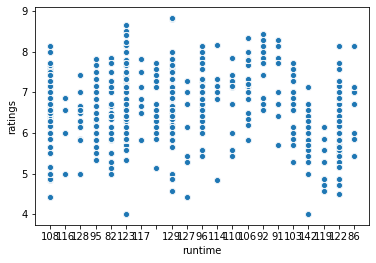

In [289]:
seaborn.scatterplot(y = joint_df['ratings'], x = joint_df['runtime'])

In [290]:
frequency_studio_df.head()

,counted,studio_avg_rating
studio,,
20th Century Fox,2295,5.444009
20th Century Fox Distribution,72,4.666667
A24,214,7.528037
A24 Films,227,7.167401
ADV Films,25,6.160000


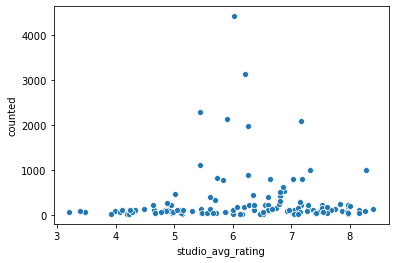

In [291]:
#seaborn bar graph for averages of studio rating. frequency_studio_df['counted']
seaborn.scatterplot(y = frequency_studio_df['counted'], x = frequency_studio_df['studio_avg_rating'])


In [292]:
big_genre_df.head()

,variable,genre
id,,
3,0,Drama
5,0,Drama
6,0,Drama
8,0,Drama
10,0,Comedy


In [293]:
with_ids_df.head()

,id,review,critic,top_critic,publisher,synopsis,rating,genre,director,writer,theater_date,runtime,studio,movie_title,ratings,id_count,release_year
0,3,A distinctly gallows take on contemporary fina...,PJ Nabarro,0,Patrick Nabarro,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,6.0,163,2012.0
1,3,It's an allegory in search of a meaning that n...,Annalee Newitz,0,io9.com,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,3.0,163,2012.0
2,3,... life lived in a bubble in financial dealin...,Sean Axmaker,0,Stream on Demand,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,9.0,163,2012.0
3,3,Continuing along a line introduced in last yea...,Daniel Kasman,0,MUBI,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,9.0,163,2012.0
4,3,... a perverse twist on neorealism...,NaN,0,Cinema Scope,"New York City, not-too-distant-future: Eric Pa...",9,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,,9.0,163,2012.0


In [294]:
big_genre_df.reset_index()

,id,variable,genre
0,3,0,Drama
1,5,0,Drama
2,6,0,Drama
3,8,0,Drama
4,10,0,Comedy
...,...,...,...
4293,1995,6,None
4294,1996,6,None
4295,1997,6,None
4296,1999,6,None


In [295]:
big_genre_df['release_year'] = with_ids_df['release_year']

In [296]:
big_genre_df['ratings'] = with_ids_df['ratings']

In [297]:
big_genre_df.head()

,variable,genre,release_year,ratings
id,,,,
3,0,Drama,2012.0,9.0
5,0,Drama,2012.0,9.0
6,0,Drama,2012.0,5.0
8,0,Drama,2012.0,9.0
10,0,Comedy,2012.0,9.0


In [298]:
big_genre_df.reset_index()

,id,variable,genre,release_year,ratings
0,3,0,Drama,2012.0,9.0
1,5,0,Drama,2012.0,9.0
2,6,0,Drama,2012.0,5.0
3,8,0,Drama,2012.0,9.0
4,10,0,Comedy,2012.0,9.0
...,...,...,...,...,...
4293,1995,6,None,1984.0,8.0
4294,1996,6,None,1984.0,8.0
4295,1997,6,None,1984.0,6.0
4296,1999,6,None,1984.0,6.0


In [299]:
gen_count = big_genre_df.groupby('genre').ratings.count()

In [300]:
gen_count.head()

genre
Action and Adventure           134
Animation                       25
Anime and Manga                  1
Art House and International     63
Classics                        29
Name: ratings, dtype: int64

In [301]:
gen_avg = big_genre_df.groupby('genre').ratings.mean()

In [302]:
gen_avg.head()

genre
Action and Adventure            6.873134
Animation                       7.280000
Anime and Manga                10.000000
Art House and International     6.904762
Classics                        6.758621
Name: ratings, dtype: float64

In [303]:
gen_count = gen_count.to_frame()

In [304]:
gen_avg = gen_avg.to_frame()

In [305]:
gen_count.set_index('ratings')

""
ratings
134
25
1
63
29
244
1
16
359


In [306]:
gen_count.reset_index(inplace = True)

In [309]:
gen_count.rename(columns={"ratings": "counts"}, inplace = True)

In [310]:
gen_count.head()

,genre,counts
0,Action and Adventure,134
1,Animation,25
2,Anime and Manga,1
3,Art House and International,63
4,Classics,29


In [311]:
gen_count['genred'] = gen_count['genre']

In [312]:
gen_avg.head()

,ratings
genre,
Action and Adventure,6.873134
Animation,7.280000
Anime and Manga,10.000000
Art House and International,6.904762
Classics,6.758621


In [313]:
gen_avg.set_index('ratings')

""
ratings
6.873134
7.280000
10.000000
6.904762
6.758621
6.807377
9.000000
6.812500
6.754875


In [321]:
gen_avg.reset_index(inplace = True)

In [322]:
gen_avg['genret'] = gen_avg['genre']

In [323]:
gen_avg.head()

,genre,ratings,genret
0,Action and Adventure,6.873134,Action and Adventure
1,Animation,7.280000,Animation
2,Anime and Manga,10.000000,Anime and Manga
3,Art House and International,6.904762,Art House and International
4,Classics,6.758621,Classics


In [326]:
gen_avg.set_index('genre', inplace = True)

In [327]:
gen_avg.head()

,ratings,genret
genre,,
Action and Adventure,6.873134,Action and Adventure
Animation,7.280000,Animation
Anime and Manga,10.000000,Anime and Manga
Art House and International,6.904762,Art House and International
Classics,6.758621,Classics


In [328]:
gen_count.set_index('genre', inplace = True)

In [329]:
gen_joined_df = gen_avg.join(gen_count, how='outer', lsuffix = 'x')


In [330]:
gen_joined_df.head()

,ratings,genret,counts,genred
genre,,,,
Action and Adventure,6.873134,Action and Adventure,134,Action and Adventure
Animation,7.280000,Animation,25,Animation
Anime and Manga,10.000000,Anime and Manga,1,Anime and Manga
Art House and International,6.904762,Art House and International,63,Art House and International
Classics,6.758621,Classics,29,Classics


In [332]:
gen_joined_df.set_index('genret', inplace = True)

In [336]:
gen_joined_df.drop(columns= 'genred',inplace = True)

In [337]:
gen_joined_df.reset_index(inplace=True)

In [338]:
gen_joined_df.head()

,genret,ratings,counts
0,Action and Adventure,6.873134,134
1,Animation,7.280000,25
2,Anime and Manga,10.000000,1
3,Art House and International,6.904762,63
4,Classics,6.758621,29


In [342]:
gen_joined_df.rename(columns={'genret': 'genre'},inplace = True)

In [343]:
gen_joined_df.head()

,genre,ratings,counts
0,Action and Adventure,6.873134,134
1,Animation,7.280000,25
2,Anime and Manga,10.000000,1
3,Art House and International,6.904762,63
4,Classics,6.758621,29


AttributeError: 'DataFrame' object has no attribute 'sort'

In [ ]:
gen_joined_df['ratings']
gen_joined_df['counts']
gen_joined_df['genre']

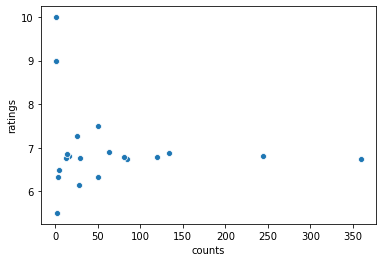

In [350]:
#seaborn bar graph for averages of studio rating. frequency_studio_df['counted']
seaborn.scatterplot(y = gen_joined_df['ratings'], x = gen_joined_df['counts'])


### Is this normally distributed?

In [ ]:
joint_df.plot.scatter(x = 'ratings', y = 'runtime', )

In [ ]:
joint_df['genre'].value_count()

In [ ]:
joined_genre_ratings.head()

In [ ]:
joined_genre_ratings['ratings'].unique()

In [ ]:
rt_average_ratings.sort_values(ascending=False)

In [ ]:
with_ids_df['movie_title'] = with_ids_df['id']

In [ ]:
with_ids_df.head(2)

### Cosmopolis

In [ ]:
with_ids_df['movie_title'].replace(3, 'Cosmopolis', inplace = True)

### Grace of My Heart

In [ ]:
with_ids_df['movie_title'].replace(5, 'Grace of My Heart', inplace = True)

### Disclosure

In [ ]:
with_ids_df['movie_title'].replace(6, 'Disclosure', inplace = True)

### My Dog Skip

In [ ]:
with_ids_df['movie_title'].replace(8, 'My Dog Skip', inplace = True)

### Orange County

In [ ]:
with_ids_df['movie_title'].replace(10, 'Orange County', inplace = True)

### Jindabyne

In [ ]:
with_ids_df['movie_title'].replace(13, 'Jindabyne', inplace = True)

### Love Ranch

In [ ]:
with_ids_df['movie_title'].replace(14, 'Love Ranch', inplace = True)

### Congo

In [ ]:
with_ids_df['movie_title'].replace(15, 'Congo', inplace = True)

### Tupac: Resurrection

In [ ]:
with_ids_df['movie_title'].replace(17, 'Tupac: Ressurection', inplace = True)

#### We can go further and replace values later. 

### American Hustle

In [ ]:
with_ids_df['movie_title'].replace(23, 'American Hustle', inplace = True)

### 47 Ronin

In [ ]:
with_ids_df['movie_title'].replace(25, '47 Ronin', inplace = True)

### Coffee and Cigarettes

In [ ]:
with_ids_df['movie_title'].replace(26, 'Coffee and Cigarettes', inplace = True)

### Mother Night

In [ ]:
with_ids_df['movie_title'].replace(33, 'Mother Night', inplace = True)

### Mission Impossible: 2

In [ ]:
with_ids_df['movie_title'].replace(34, 'Mission Impossible: 2', inplace = True)

### Twin Falls Idaho

In [ ]:
with_ids_df['movie_title'].replace(35, 'Twin Falls Idaho', inplace = True)

### Casa de los Babys

In [ ]:
with_ids_df['movie_title'].replace(40, 'Casa de los Babys', inplace = True)

### Sweet Sixteen

In [ ]:
with_ids_df['movie_title'].replace(41, 'Sweet Sixteen', inplace = True)

### Meet the Deedles

In [ ]:
with_ids_df['movie_title'].replace(45, 'Meet the Deedles', inplace = True)

### The Full Monty

In [ ]:
with_ids_df['movie_title'].replace(46, 'The Full Monty', inplace = True)

### While You Were Sleeping

In [ ]:
with_ids_df['movie_title'].replace(52, 'While You Were Sleeping', inplace = True)

### La Grande Bellezza

In [ ]:
with_ids_df['movie_title'].replace(54, 'La Grande Bellezza', inplace = True)

### Dead Presidents

In [ ]:
with_ids_df['movie_title'].replace(56, 'Dead Presidents', inplace = True)

### Silver Linings Playbook

In [ ]:
with_ids_df['movie_title'].replace(57, 'Silver Linings Playbook', inplace = True)

### Hannah and Her Sisters

In [ ]:
with_ids_df['movie_title'].replace(58, 'Hannah and Her Sisters', inplace = True)

### Final Destination 3

In [ ]:
with_ids_df['movie_title'].replace(61, 'Final Destination 3', inplace = True)

### The Devils Own

In [ ]:
with_ids_df['movie_title'].replace(63, 'The Devils Own', inplace = True)

### Wrongfully Accused

In [ ]:
with_ids_df['movie_title'].replace(64, 'Wrongfully Accused', inplace = True)

### Enchanted

In [ ]:
with_ids_df['movie_title'].replace(65, 'Enchanted', inplace = True)

### Devils Due

In [ ]:
with_ids_df['movie_title'].replace(67, 'Devils Due', inplace = True)

### Raiders of the Lost Ark

In [ ]:
with_ids_df['movie_title'].replace(70, 'Raiders of the Lost Ark', inplace = True)

### Larry Crowne

In [ ]:
with_ids_df['movie_title'].replace(77, 'Larry Crowne', inplace = True)

### Donnie Darko

In [ ]:
with_ids_df['movie_title'].replace(82, 'Donnie Darko', inplace = True)

### Maos Last Dancer

In [ ]:
with_ids_df['movie_title'].replace(87, 'Maos Last Dancer', inplace = True)

### Billy's Hollywood Screen Kiss

In [ ]:
with_ids_df['movie_title'].replace(88, 'Billys Hollywood Screen Kiss', inplace = True)

### Ninotchka

In [ ]:
with_ids_df['movie_title'].replace(93, 'Ninotchka', inplace = True)

### Bleed for This

In [ ]:
with_ids_df['movie_title'].replace(95, 'Bleed for This', inplace = True)

### SubUrbia

In [ ]:
with_ids_df['movie_title'].replace(96, 'SubUrbia', inplace = True)

### Two Weeks Notice

In [ ]:
with_ids_df['movie_title'].replace(99, 'Two Weeks Notice', inplace = True)

### The Joneses

In [ ]:
with_ids_df['movie_title'].replace(108, 'The Joneses', inplace = True)

### It's a Wonderful Life

In [ ]:
with_ids_df['movie_title'].replace(110, 'Its a Wonderful Life', inplace = True)

### Toy Story 2

In [ ]:
with_ids_df['movie_title'].replace(115, 'Toy Story 2', inplace = True)

### Galaxy Quest

In [ ]:
with_ids_df['movie_title'].replace(118, 'Galaxy Quest', inplace = True)

### Snake Eyes

In [ ]:
with_ids_df['movie_title'].replace(119, 'Snake Eyes', inplace = True)

### So I Married an Axe Murderer

In [ ]:
with_ids_df['movie_title'].replace(121, 'So I Married an Axe Murderer', inplace = True)

### Reign of Fire

In [ ]:
with_ids_df['movie_title'].replace(124, 'Reign of Fire', inplace = True)

### Jacob's Ladder

In [ ]:
with_ids_df['movie_title'].replace(127, 'Jacobs Ladder', inplace = True)

### Woman on the Beach

In [ ]:
with_ids_df['movie_title'].replace(130, 'Woman on the Beach', inplace = True)

### Cowboy Bebop: The Movie

In [ ]:
with_ids_df['movie_title'].replace(133, 'Cowboy Bebop', inplace = True)

### CASE 39

In [ ]:
with_ids_df['movie_title'].replace(136, 'CASE 39', inplace = True)

### Up Close & Personal

In [ ]:
with_ids_df['movie_title'].replace(138, 'Up Close & Personal', inplace = True)

### Where Badlands

In [ ]:
with_ids_df['movie_title'].replace(140, 'Where Badlands', inplace = True)

### Muriel's Wedding

In [ ]:
with_ids_df['movie_title'].replace(152, 'Muriels Wedding', inplace = True)

### Diary of a Wimpy Kid

In [ ]:
with_ids_df['movie_title'].replace(153, 'Diary of a Wimpy Kid', inplace = True)

### Invictus

In [ ]:
with_ids_df['movie_title'].replace(158, 'Invictus', inplace = True)

### Dickie Roberts: Former Child Star

In [ ]:
with_ids_df['movie_title'].replace(159, 'Dickie Roberts: Former Child Star', inplace = True)

### The Vertical Limit

In [ ]:
with_ids_df['movie_title'].replace(160, 'The Vertical Limit', inplace = True)

### Mom and Dad Save the World

In [ ]:
with_ids_df['movie_title'].replace(162, 'Mom and Dad Save the World', inplace = True)

### Valentine

In [ ]:
with_ids_df['movie_title'].replace(165, 'Valentine', inplace = True)

### Body of Evidence

In [ ]:
with_ids_df['movie_title'].replace(180, 'Body of Evidence', inplace = True)

### Jason's Lyric

In [ ]:
with_ids_df['movie_title'].replace(181, 'Jasons Lyric', inplace = True)

### Hotel For Dogs

In [ ]:
with_ids_df['movie_title'].replace(182, 'Love Ranch', inplace = True)

### Safety Not Guaranteed

In [ ]:
with_ids_df['movie_title'].replace(188, 'Safety Not Guaranteed', inplace = True)

### Entrapment

In [ ]:
with_ids_df['movie_title'].replace(195, 'Entrapment', inplace = True)

### King's Ransom

In [ ]:
with_ids_df['movie_title'].replace(196, 'Kings Ransom', inplace = True)

### 100 Streeets

In [ ]:
with_ids_df['movie_title'].replace(199, '100 Streets', inplace = True)

### Going My Way

In [ ]:
with_ids_df['movie_title'].replace(200, 'Going My Way', inplace = True)

### Fresh

In [ ]:
with_ids_df['movie_title'].replace(201, 'Fresh', inplace = True)

### Nosferatu

In [ ]:
with_ids_df['movie_title'].replace(205, 'Nosferatu', inplace = True)

### The Light Between Oceans

In [ ]:
with_ids_df['movie_title'].replace(210, 'The Light Between Oceans', inplace = True)

### Dancer

In [ ]:
with_ids_df['movie_title'].replace(211, 'Dancer', inplace = True)

### Bart Got a Room

In [ ]:
with_ids_df['movie_title'].replace(212, 'Bart Got a Room', inplace = True)

### The Ring

In [ ]:
with_ids_df['movie_title'].replace(218, 'The Ring', inplace = True)

### Bride Of Chucky (4th)

In [ ]:
with_ids_df['movie_title'].replace(226, 'Bride Of Chucky', inplace = True)

### Bandslam

In [ ]:
with_ids_df['movie_title'].replace(227, 'Bandslam', inplace = True)

### Star Trek 7

In [ ]:
with_ids_df['movie_title'].replace(232, 'Star Trek 7', inplace = True)

### Tremors

In [ ]:
with_ids_df['movie_title'].replace(233, 'Tremors', inplace = True)

### Gladiator

In [ ]:
with_ids_df['movie_title'].replace(235, 'Gladiator', inplace = True)

### Light it Up

In [ ]:
with_ids_df['movie_title'].replace(242, 'Light it Up', inplace = True)

### Best Laid Plans

In [ ]:
with_ids_df['movie_title'].replace(248, 'Best Laid Plans', inplace = True)

### Waist Deep

In [ ]:
with_ids_df['movie_title'].replace(249, 'Waist Deep', inplace = True)

### Carol

In [ ]:
with_ids_df['movie_title'].replace(251, 'Carol', inplace = True)

### Soylent Green

In [ ]:
with_ids_df['movie_title'].replace(254, 'Soylent Green', inplace = True)

### Nightmare on Elm Street 4

In [ ]:
with_ids_df['movie_title'].replace(255, 'Nightmare on Elm Street 4', inplace = True)

### House of 1000 Corpses

In [ ]:
with_ids_df['movie_title'].replace(263, 'House of 1000 Corpses', inplace = True)

### Sleeping with the Enemy

In [ ]:
with_ids_df['movie_title'].replace(264, 'Sleeping with the Enemy', inplace = True)

### Good Luck Chuck

In [ ]:
with_ids_df['movie_title'].replace(267, 'Good Luck Chuck', inplace = True)

### Down to the Bone

In [ ]:
with_ids_df['movie_title'].replace(271, 'Down to the Bone', inplace = True)

### Jane Got a Gun

In [ ]:
with_ids_df['movie_title'].replace(274, 'Jane Got a Gun', inplace = True)

### The Jerk

In [ ]:
with_ids_df['movie_title'].replace(276, 'The Jerk', inplace = True)

### Heavenly Creatures

In [ ]:
with_ids_df['movie_title'].replace(279, 'Heavenly Creatures', inplace = True)

### A Million Ways to Die

In [ ]:
with_ids_df['movie_title'].replace(281, 'A Million Ways to Die', inplace = True)

### Tim and Eric's Billion Dollar Movie

In [ ]:
with_ids_df['movie_title'].replace(285, 'Tim and Erics Billion Dollar Movie', inplace = True)

### Miami Vice

In [ ]:
with_ids_df['movie_title'].replace(290, 'Miami Vice', inplace = True)

### Kelly's Heroes

In [ ]:
with_ids_df['movie_title'].replace(296, 'Kellys Heroes', inplace = True)

### Crossover

In [ ]:
with_ids_df['movie_title'].replace(299, 'Crossover', inplace = True)

### Eat Pray Love

In [ ]:
with_ids_df['movie_title'].replace(300, 'Eat Pray Love', inplace = True)

### Secret Window

In [ ]:
with_ids_df['movie_title'].replace(301, 'Secret Window', inplace = True)

### Rising Sun

In [ ]:
with_ids_df['movie_title'].replace(302, 'Rising Sun', inplace = True)

### Friends with Kids

In [ ]:
with_ids_df['movie_title'].replace(304, 'Friends with Kids', inplace = True)

### Blade Runner

In [ ]:
with_ids_df['movie_title'].replace(305, 'Blade Runner', inplace = True)

### Identity Thief

In [ ]:
with_ids_df['movie_title'].replace(321, 'Identity Thief', inplace = True)

### Crimson Peak

In [ ]:
with_ids_df['movie_title'].replace(322, 'Crimson Peak', inplace = True)

### Soul Power

In [ ]:
with_ids_df['movie_title'].replace(331, 'Soul Power', inplace = True)

### Ed Wood

In [ ]:
with_ids_df['movie_title'].replace(334, 'Ed Wood', inplace = True)

### The Flowers of War

In [ ]:
with_ids_df['movie_title'].replace(337, 'The Flowers of War', inplace = True)

### Hereafter

In [ ]:
with_ids_df['movie_title'].replace(338, 'Hereafter', inplace = True)

### The Single Moms Club

In [ ]:
with_ids_df['movie_title'].replace(345, 'The Single Moms Club', inplace = True)

### Autumn in New York

In [ ]:
with_ids_df['movie_title'].replace(346, 'Autumn in New York', inplace = True)

### A Haunted House 2

In [ ]:
with_ids_df['movie_title'].replace(355, 'A Haunted House 2', inplace = True)

### The Libertine

In [ ]:
with_ids_df['movie_title'].replace(356, 'The Libertine', inplace = True)

### Planet 51

In [ ]:
with_ids_df['movie_title'].replace(357, 'Planet 51', inplace = True)

### Rocky 3

In [ ]:
with_ids_df['movie_title'].replace(359, 'Rocky 3', inplace = True)

### Addams Family Values

In [ ]:
with_ids_df['movie_title'].replace(364, 'Addams Family Values', inplace = True)

### Tokyo Story

In [ ]:
with_ids_df['movie_title'].replace(368, 'Tokyo Story', inplace = True)

### Bounce

In [ ]:
with_ids_df['movie_title'].replace(370, 'Bounce', inplace = True)

### Hanging Up

In [ ]:
with_ids_df['movie_title'].replace(376, 'Hanging Up', inplace = True)

### Taking Woodstock

In [ ]:
with_ids_df['movie_title'].replace(377, 'Taking Woodstock', inplace = True)

### Woman of the Year

In [ ]:
with_ids_df['movie_title'].replace(384, 'Woman of the Year', inplace = True)

### Elmer Gantry

In [ ]:
with_ids_df['movie_title'].replace(393, 'Elmer Gantry', inplace = True)

### Love, Simon

In [ ]:
with_ids_df['movie_title'].replace(394, 'Love Simon', inplace = True)

### Something Wild

In [ ]:
with_ids_df['movie_title'].replace(396, 'Something Wild', inplace = True)

### 8 Women

In [ ]:
with_ids_df['movie_title'].replace(398, '8 Women', inplace = True)

### Dante's Peak

In [ ]:
with_ids_df['movie_title'].replace(400, 'Dantes Peak', inplace = True)

### Schindler's List

In [ ]:
with_ids_df['movie_title'].replace(401, 'Schindlers List ', inplace = True)

### The Baytown Outlaws

In [ ]:
with_ids_df['movie_title'].replace(409, 'The Baytown Outlaws', inplace = True)

### Cadillac Records

In [ ]:
with_ids_df['movie_title'].replace(410, 'Cadillac Records', inplace = True)

### Live Flesh

In [ ]:
with_ids_df['movie_title'].replace(417, 'Live Flesh', inplace = True)

### Vantage Point

In [ ]:
with_ids_df['movie_title'].replace(418, 'Vantage Point', inplace = True)

### The Darkest Minds

In [ ]:
with_ids_df['movie_title'].replace(419, 'The Darkest Minds', inplace = True)

### Sound City

In [ ]:
with_ids_df['movie_title'].replace(423, 'Sound City', inplace = True)

### Bean

In [ ]:
with_ids_df['movie_title'].replace(425, 'Bean', inplace = True)

### Evelyn

In [ ]:
with_ids_df['movie_title'].replace(427, 'Evelyn', inplace = True)

### Rocky 5

In [ ]:
with_ids_df['movie_title'].replace(428, 'Rocky 5', inplace = True)

### Pootie Tang

In [ ]:
with_ids_df['movie_title'].replace(432, 'Pootie Tang', inplace = True)

### The Bourne Identity

In [ ]:
with_ids_df['movie_title'].replace(433, 'The Bourne Identity', inplace = True)

### Fantastic Four

In [ ]:
with_ids_df['movie_title'].replace(443, 'Fantastic Four', inplace = True)

### Mannequin 2

In [ ]:
with_ids_df['movie_title'].replace(450, 'Mannequin 2', inplace = True)

### Aliens In The Attic

In [ ]:
with_ids_df['movie_title'].replace(453, 'Aliens In The Attic', inplace = True)

### Silent Hill

In [ ]:
with_ids_df['movie_title'].replace(456, 'Silent Hill', inplace = True)

### Midnight in Paris

In [ ]:
with_ids_df['movie_title'].replace(458, 'Midnight in Paris', inplace = True)

### I Still Know What You Did Last Summer

In [ ]:
with_ids_df['movie_title'].replace(462, 'I Still Know What You Did Last Summer', inplace = True)

### Play Misty for Me

In [ ]:
with_ids_df['movie_title'].replace(466, 'Play Misty for Me', inplace = True)

### Hardball

In [ ]:
with_ids_df['movie_title'].replace(468, 'Hardball', inplace = True)

### Goodbye Lover

In [ ]:
with_ids_df['movie_title'].replace(471, 'Goodbye Lover', inplace = True)

### Betty Blue

In [ ]:
with_ids_df['movie_title'].replace(473, 'Betty Blue', inplace = True)

### Bus 174

In [ ]:
with_ids_df['movie_title'].replace(477, 'Bus 174', inplace = True)

### The Five Senses

In [ ]:
with_ids_df['movie_title'].replace(479, 'The Five Senses', inplace = True)

### Mars Needs Moms

In [ ]:
with_ids_df['movie_title'].replace(482, 'Mars Needs Moms', inplace = True)

### Ixcanul

In [ ]:
with_ids_df['movie_title'].replace(483, 'Ixcanul', inplace = True)

### We Have a Pope

In [ ]:
with_ids_df['movie_title'].replace(486, 'We Have a Pope', inplace = True)

### Empire of the Sun

In [ ]:
with_ids_df['movie_title'].replace(487, 'Empire of the Sun', inplace = True)

### Bee Movie

In [ ]:
with_ids_df['movie_title'].replace(488, 'Bee Movie', inplace = True)

### Cheaper By The Dozen 2

In [ ]:
with_ids_df['movie_title'].replace(491, 'Cheaper By The Dozen 2', inplace = True)

### My Neighbor Totoro

In [ ]:
with_ids_df['movie_title'].replace(494, 'My Neighbor Totoro', inplace = True)

### Murphy's Romance

In [ ]:
with_ids_df['movie_title'].replace(497, 'Murphys Romance', inplace = True)

### Napoleon Dynamite

In [ ]:
with_ids_df['movie_title'].replace(504, 'Napoleon Dynamite', inplace = True)

### The Kings of Summer

In [ ]:
with_ids_df['movie_title'].replace(505, 'The Kings of Summer', inplace = True)

### The Mambo Kings

In [ ]:
with_ids_df['movie_title'].replace(507, 'The Mambo Kings', inplace = True)

### From Dusk Till Dawn

In [ ]:
with_ids_df['movie_title'].replace(508, 'From Dusk Till Dawn', inplace = True)

### Love, Rosie

In [ ]:
with_ids_df['movie_title'].replace(518, 'Love Rosie', inplace = True)

### Wild Strawberries

In [ ]:
with_ids_df['movie_title'].replace(524, 'Wild Strawberries', inplace = True)

### The Savages

In [ ]:
with_ids_df['movie_title'].replace(528, 'The Savages', inplace = True)

### The Tao of Steve

In [ ]:
with_ids_df['movie_title'].replace(539, 'The Tao of Steve', inplace = True)

### Joy Ride

In [ ]:
with_ids_df['movie_title'].replace(542, 'Joy Ride', inplace = True)

### Kiss Me, Stupid

In [ ]:
with_ids_df['movie_title'].replace(547, 'Kiss Me Stupid', inplace = True)

### Jonah Hex

In [ ]:
with_ids_df['movie_title'].replace(554, 'Jonah Hex', inplace = True)

### Damage

In [ ]:
with_ids_df['movie_title'].replace(556, 'Damage', inplace = True)

### The Wedding Date

In [ ]:
with_ids_df['movie_title'].replace(563, 'The Wedding Date', inplace = True)

### Bolt

In [ ]:
with_ids_df['movie_title'].replace(564, 'Bolt', inplace = True)

### Pitch Perfect 3

In [ ]:
with_ids_df['movie_title'].replace(567, 'Pitch Perfect 3', inplace = True)

### National Security

In [ ]:
with_ids_df['movie_title'].replace(572, 'National Security', inplace = True)

### Roll Bounce

In [ ]:
with_ids_df['movie_title'].replace(573, 'Roll Bounce', inplace = True)

### Radio Days

In [ ]:
with_ids_df['movie_title'].replace(578, 'Radio Days', inplace = True)

### CHAPPAQUIDDICK

In [ ]:
with_ids_df['movie_title'].replace(579, 'CHAPPAQUIDDICK', inplace = True)

### Pleasantville

In [ ]:
with_ids_df['movie_title'].replace(581, 'Pleasantville', inplace = True)

### A Most Wanted Man

In [ ]:
with_ids_df['movie_title'].replace(582, 'A Most Wanted Man', inplace = True)

### The Other Boleyn Girl

In [ ]:
with_ids_df['movie_title'].replace(590, 'The Other Boleyn Girl', inplace = True)

### Ghostbusters

In [ ]:
with_ids_df['movie_title'].replace(594, 'Ghostbusters', inplace = True)

### Waiting to Exhale

In [ ]:
with_ids_df['movie_title'].replace(595, 'Waiting to Exhale', inplace = True)

### Arctic Tale

In [ ]:
with_ids_df['movie_title'].replace(596, 'Arctic Tale', inplace = True)

### The Accidental Tourist

In [ ]:
with_ids_df['movie_title'].replace(597, 'The Accidental Tourist', inplace = True)

### Superman 4

In [ ]:
with_ids_df['movie_title'].replace(601, 'Superman 4', inplace = True)

### Tommy Boy

In [ ]:
with_ids_df['movie_title'].replace(605, 'Tommy Boy', inplace = True)

### The Angriest Man in Brooklyn

In [ ]:
with_ids_df['movie_title'].replace(608, 'The Angriest Man in Brooklyn', inplace = True)

### The Tourist

In [ ]:
with_ids_df['movie_title'].replace(610, 'The Tourist', inplace = True)

### Mystic River

In [ ]:
with_ids_df['movie_title'].replace(611, 'Mystic River', inplace = True)

### Money Train

In [ ]:
with_ids_df['movie_title'].replace(612, 'Money Train', inplace = True)

### Jason X

In [ ]:
with_ids_df['movie_title'].replace(626, 'Jason X', inplace = True)

### The Kid Stays in the Picture

In [ ]:
with_ids_df['movie_title'].replace(627, 'The Kid Stays in the Picture', inplace = True)

### 2 Days in the Valley

In [ ]:
with_ids_df['movie_title'].replace(638, '2 Days in the Valley', inplace = True)

### Veronica Mars

In [ ]:
with_ids_df['movie_title'].replace(646, 'Veronica Mars', inplace = True)

### Rio Bravo

In [ ]:
with_ids_df['movie_title'].replace(648, 'Rio Bravo', inplace = True)

### Ed Wood

In [ ]:
with_ids_df['movie_title'].replace(334, 'Ed Wood', inplace = True)

In [ ]:
with_ids_df[with_ids_df['id'] > 648]

In [ ]:
with_ids_df['id'].value_counts()

In [ ]:
#set movie title

In [ ]:
#can we remove some theater dates

In [ ]:
#genre separation is imperative

In [ ]:
for cell in new_df.columns:
    new_df[cell].replace('fresh',9, inplace=True)

# What about just from the top critics? 

### Sometimes it feels like the chicken v. egg scenario:

### Do great ratings drive 

### are top critics indicative of average??  THEN VERSUS NOW???? 

### relationships - genre and rating, runtime and rating, number of reviews and rating, etc.

Ratings from top critics can drive 

# Other Dataframes

In [ ]:
# Convert the 6 pieces


# Let's create a lambda function to shape up some of these '/10' values.

#### FInally our data is all decimals with the exception of the '/10' fractions.
#### One good way to work through this data is going to be to multiply everything by 10. 
#### Then, any value over 10, we will know to filter back through it and divide by 10. This will not work for the value of one which we will have to remove beforehand because if we multiply it by 10, it will look like a rating of 10.

In [ ]:
less_one_row_rotten_df['ratingx'].dtype

In [ ]:
less_one_row_rotten_df.head()

In [ ]:
id_3 = less_one_row_rotten_df[less_one_row_rotten_df['id'] == 3]

In [ ]:
id_3.shape

In [ ]:
id_3['movie_title'][0:163] = 'Cosmopolis'

In [ ]:
more_crew = pd.read_csv('imdb.title.principals.csv')
more_crew.head()

In [ ]:
more_crew.shape

In [ ]:
crew_df = pd.read_csv('imdb.title.crew.csv')
crew_df.head()

In [ ]:
crew_df.shape

In [ ]:
title_info = pd.read_csv('imdb.title.basics.csv')
title_info.head(20)

In [ ]:
title_info.shape

In [ ]:
title_df = pd.read_csv('imdb.title.akas.csv')
title_df[1:50]

In [ ]:
title_df.shape

In [ ]:
film_employees = pd.read_csv('imdb.name.basics.csv')
film_employees.head()

In [ ]:
film_employees.shape

In [ ]:
movie_gross = pd.read_csv('bom.movie_gross.csv')
movie_gross.head()

In [ ]:
movie_gross.shape

In [ ]:
title_ratings = pd.read_csv('imdb.title.ratings.csv')
title_ratings.head()

In [ ]:
title_ratings.shape

# Assumptions & Understandings

### 1. The movie will be in English. It may or may not be shown in other countries.
### 2. The 'best' movies are defined as what is most profitable, and also most highly rated.
### 3. They are seeking to make more than one movie so taking rating into account matters.
### 4. The success of a sequel is dependent of the original so those need to be removed or analyzed independently. 
### 5. Revenue is entirely generated by ticket sales. 


# Questions

In [ ]:
would you say of the most profitable, what are the most highly rated? 
of the most highly rated, what are the most profitable?


# Defining 'BEST' 

### RATINGS DO MATTER. 